# Description: This program uses the dual moving average crossover to determine when to buy and sell a stock. We are using Nvidia Share here for example purposes.

# The provided code is purely for educational purposes, to understand the "Dual Moving Average" concept of Algo Trading

# Author: Vikram Jeet Singh
# Email: vjssnotra@gmail.com



## What is Dual Moving Average Crossover?

### The Dual Moving Average Crossover strategy uses two moving averages to generate buy and sell signals. For example, if you have a 30-day Simple Moving Average (SMA30) as the short-term average and a 100-day Simple Moving Average (SMA100) as the long-term average of the share price data then:

###Buy Signal: When SMA30 crosses above SMA100, it suggests a potential upward trend. Hence, BUY.
###Sell Signal: When SMA30 crosses below SMA100, it indicates a potential downward trend.
###This approach smoothens price data over time, helping traders identify trend changes while reducing market noise, making it effective for trend-following strategies. Hence, SELL.

### We are going to implement this strategy in Python and will use Nvidia's share price data from Yahoo Finance for building the function. We will be using the data between the dates 2 OCT 2016 to 30 DEC 2023.

## Libraries used
### --> Numpy
### --> Pandas
### --> Matplotlib
### --> datetime
### --> yfinance (for extracting Nvidia Share price data)

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [4]:
#downloading data using yahoo
!pip install yfinance

In [5]:
import yfinance as yf

ticker='NVDA'
data=yf.download(ticker, start='2016-10-02', end='2023-12-30')

print(data)

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          NVDA       NVDA       NVDA       NVDA   
Date                                                                    
2016-10-03 00:00:00+00:00   1.683779   1.711250   1.737750   1.708250   
2016-10-04 00:00:00+00:00   1.680090   1.707500   1.742500   1.694750   
2016-10-05 00:00:00+00:00   1.678368   1.705750   1.739500   1.700500   
2016-10-06 00:00:00+00:00   1.656475   1.683500   1.695750   1.656500   
2016-10-07 00:00:00+00:00   1.644421   1.671250   1.699250   1.666500   
...                              ...        ...        ...        ...   
2023-12-22 00:00:00+00:00  48.819527  48.830002  49.382999  48.466999   
2023-12-26 00:00:00+00:00  49.268425  49.278999  49.599998  48.959999   
2023-12-27 00:00:00+00:00  49.406395  49.417000  49.680000  49.084999   
2023-12-28 00:00:00+00:00  49.511375  49.521999  49.883999  49.411999   
2023-12-29 00:00:00+00:00  49.511375  49.521999  49

In [6]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2016-10-03 00:00:00+00:00,1.683779,1.71125,1.73775,1.70825,1.71300,242596000
2016-10-04 00:00:00+00:00,1.680090,1.70750,1.74250,1.69475,1.71375,281624000
2016-10-05 00:00:00+00:00,1.678368,1.70575,1.73950,1.70050,1.72200,305440000
2016-10-06 00:00:00+00:00,1.656475,1.68350,1.69575,1.65650,1.68525,360212000
2016-10-07 00:00:00+00:00,1.644421,1.67125,1.69925,1.66650,1.69475,286260000


In [7]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2016-10-03 00:00:00+00:00,1.683779,1.711250,1.737750,1.708250,1.713000,242596000
2016-10-04 00:00:00+00:00,1.680090,1.707500,1.742500,1.694750,1.713750,281624000
2016-10-05 00:00:00+00:00,1.678368,1.705750,1.739500,1.700500,1.722000,305440000
2016-10-06 00:00:00+00:00,1.656475,1.683500,1.695750,1.656500,1.685250,360212000
2016-10-07 00:00:00+00:00,1.644421,1.671250,1.699250,1.666500,1.694750,286260000
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,48.819527,48.830002,49.382999,48.466999,49.195000,252507000
2023-12-26 00:00:00+00:00,49.268425,49.278999,49.599998,48.959999,48.967999,244200000


In [8]:
data.columns = data.columns.droplevel(1)
data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-10-03 00:00:00+00:00,1.683779,1.711250,1.737750,1.708250,1.713000,242596000
2016-10-04 00:00:00+00:00,1.680090,1.707500,1.742500,1.694750,1.713750,281624000
2016-10-05 00:00:00+00:00,1.678368,1.705750,1.739500,1.700500,1.722000,305440000
2016-10-06 00:00:00+00:00,1.656475,1.683500,1.695750,1.656500,1.685250,360212000
2016-10-07 00:00:00+00:00,1.644421,1.671250,1.699250,1.666500,1.694750,286260000
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,48.819527,48.830002,49.382999,48.466999,49.195000,252507000
2023-12-26 00:00:00+00:00,49.268425,49.278999,49.599998,48.959999,48.967999,244200000
2023-12-27 00:00:00+00:00,49.406395,49.417000,49.680000,49.084999,49.511002,233648000


In [9]:
print(data.columns)


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [10]:
# Remove the name 'Price' from the columns
data.columns.name = None

# Reset the index (if necessary) and rename the index column
data.reset_index(inplace=True)

# Rename the 'Date' column
data.rename(columns={'index': 'Date'}, inplace=True)

# Display the cleaned DataFrame
print(data.head())


                       Date  Adj Close    Close     High      Low     Open  \
0 2016-10-03 00:00:00+00:00   1.683779  1.71125  1.73775  1.70825  1.71300   
1 2016-10-04 00:00:00+00:00   1.680090  1.70750  1.74250  1.69475  1.71375   
2 2016-10-05 00:00:00+00:00   1.678368  1.70575  1.73950  1.70050  1.72200   
3 2016-10-06 00:00:00+00:00   1.656475  1.68350  1.69575  1.65650  1.68525   
4 2016-10-07 00:00:00+00:00   1.644421  1.67125  1.69925  1.66650  1.69475   

      Volume  
0  242596000  
1  281624000  
2  305440000  
3  360212000  
4  286260000  


In [11]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-10-03 00:00:00+00:00,1.683779,1.711250,1.737750,1.708250,1.713000,242596000
1,2016-10-04 00:00:00+00:00,1.680090,1.707500,1.742500,1.694750,1.713750,281624000
2,2016-10-05 00:00:00+00:00,1.678368,1.705750,1.739500,1.700500,1.722000,305440000
3,2016-10-06 00:00:00+00:00,1.656475,1.683500,1.695750,1.656500,1.685250,360212000
4,2016-10-07 00:00:00+00:00,1.644421,1.671250,1.699250,1.666500,1.694750,286260000
...,...,...,...,...,...,...,...
1818,2023-12-22 00:00:00+00:00,48.819527,48.830002,49.382999,48.466999,49.195000,252507000
1819,2023-12-26 00:00:00+00:00,49.268425,49.278999,49.599998,48.959999,48.967999,244200000
1820,2023-12-27 00:00:00+00:00,49.406395,49.417000,49.680000,49.084999,49.511002,233648000
1821,2023-12-28 00:00:00+00:00,49.511375,49.521999,49.883999,49.411999,49.643002,246587000


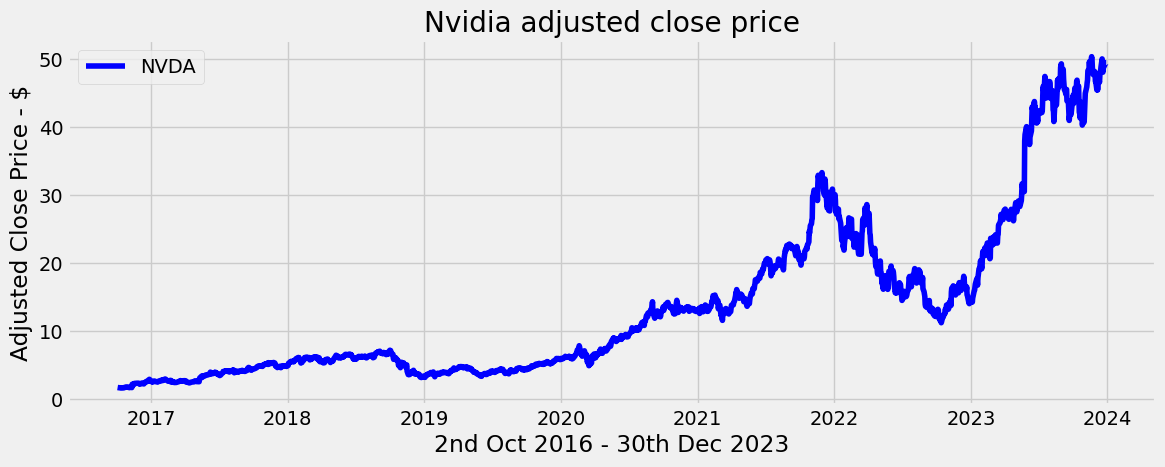

In [19]:
# visualising the data
plt.figure(figsize=(12.5,4.5))
# plt.plot(data['Adj Close'], label='NVDA')
plt.plot(data['Date'], data['Adj Close'], label='NVDA', color='blue')
plt.title('Nvidia adjusted close price')
plt.xlabel('2nd Oct 2016 - 30th Dec 2023')
plt.ylabel('Adjusted Close Price - $')
plt.legend(loc='upper left')
plt.show()

In [21]:
#short term average of 30 days window
sma30=pd.DataFrame()
sma30['Adj Close Price']=data['Adj Close'].rolling(window=30).mean()

In [22]:
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1818,48.179558
1819,48.211159
1820,48.237863
1821,48.233542


In [23]:
#long term average with a 100 days window
sma100=pd.DataFrame()
sma100['Adj Close Price']=data['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1818,45.569501
1819,45.617206
1820,45.664642
1821,45.705761


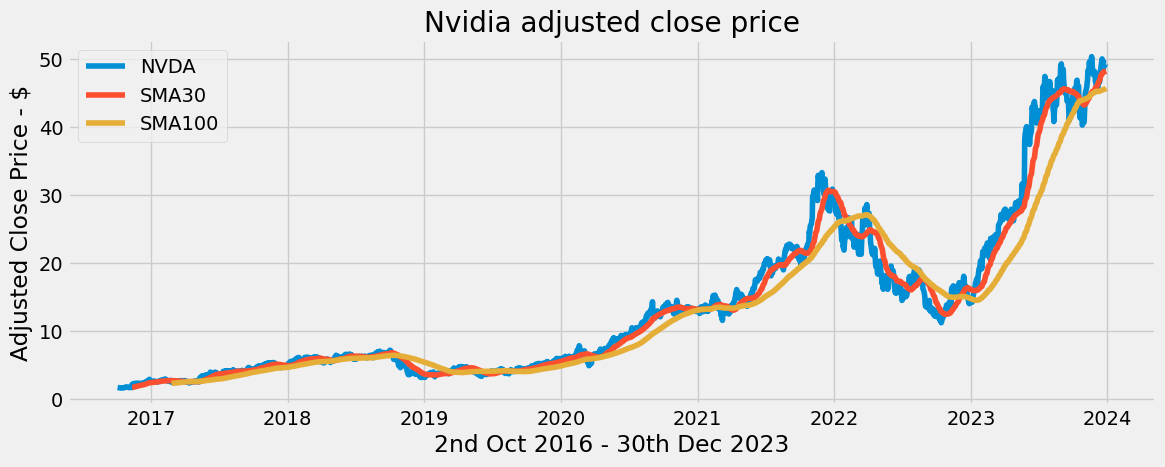

In [28]:
#visualising data
plt.figure(figsize=(12.5,4.5))
plt.plot(data['Date'],data['Adj Close'], label='NVDA')
plt.plot(data['Date'],sma30['Adj Close Price'], label='SMA30')
plt.plot(data['Date'],sma100['Adj Close Price'], label='SMA100')
plt.title('Nvidia adjusted close price')
plt.xlabel('2nd Oct 2016 - 30th Dec 2023')
plt.ylabel('Adjusted Close Price - $')
plt.legend(loc='upper left')
plt.show()

In [53]:
#creating a new DF to store all the data
df=pd.DataFrame()
df['NVDA']=data['Adj Close']
df['SMA30']=sma30['Adj Close Price']
df['SMA100']=sma100['Adj Close Price']
df

,NVDA,SMA30,SMA100
0,1.683779,NaN,NaN
1,1.680089,NaN,NaN
2,1.678368,NaN,NaN
3,1.656475,NaN,NaN
4,1.644421,NaN,NaN
...,...,...,...
1818,48.819527,48.179558,45.569501
1819,49.268425,48.211159,45.617206
1820,49.406395,48.237863,45.664642
1821,49.511375,48.233543,45.705761


In [54]:
#creating a function which signals us the Buy and Sell Price, we will use that price later to plot it on graph
def buy_sell(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1  # Indicates whether a "Buy" or "Sell" signal is active

    for i in range(len(data)):
        # Check if SMA30 is greater than SMA100
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:  # If not already in a "Buy" state
                sig_price_buy.append(data['NVDA'][i])  # Buy signal
                sig_price_sell.append(np.nan)
                flag = 1  # Set to "Buy" state
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)

        # Check if SMA30 is less than SMA100
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:  # If not already in a "Sell" state
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['NVDA'][i])  # Sell signal
                flag = 0  # Set to "Sell" state
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)

        # If SMA30 equals SMA100, no action
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)

    return sig_price_buy, sig_price_sell


In [55]:
#storing the buy and sell data into a variable
buy_sell=buy_sell(df)
df['Buy_Signal_Price']=buy_sell[0]
df['Sell_Signal_Price']=buy_sell[1]
df

,NVDA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,1.683779,NaN,NaN,NaN,NaN
1,1.680089,NaN,NaN,NaN,NaN
2,1.678368,NaN,NaN,NaN,NaN
3,1.656475,NaN,NaN,NaN,NaN
4,1.644421,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1818,48.819527,48.179558,45.569501,NaN,NaN
1819,49.268425,48.211159,45.617206,NaN,NaN
1820,49.406395,48.237863,45.664642,NaN,NaN
1821,49.511375,48.233543,45.705761,NaN,NaN


In [56]:
df[df['Sell_Signal_Price'].notna()]

,NVDA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
131,2.420286,2.544507,2.545519,NaN,2.420286
401,6.196612,5.649137,5.649380,NaN,6.196612
520,5.149382,6.355322,6.367461,NaN,5.149382
670,3.554177,4.057941,4.062586,NaN,3.554177
1079,12.827828,13.182820,13.186456,NaN,12.827828
1088,12.957757,13.200160,13.202350,NaN,12.957757
1128,12.920819,13.300754,13.362943,NaN,12.920819
1346,24.688644,26.242999,26.314722,NaN,24.688644
1775,42.962006,43.891454,43.921196,NaN,42.962006


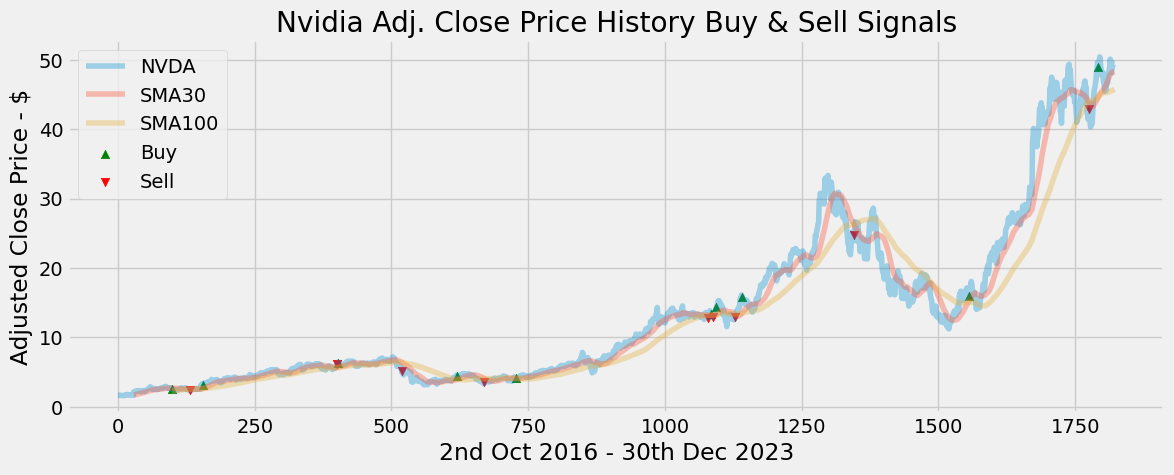

In [57]:
#visualise the data and strategy to buy and sell
plt.figure(figsize=(12.6,4.6))
plt.plot(df['NVDA'],label='NVDA', alpha=0.35)
plt.plot(df['SMA30'],label='SMA30', alpha=0.35)
plt.plot(df['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(df.index,df['Buy_Signal_Price'],label='Buy',color='green',marker='^')
plt.scatter(df.index,df['Sell_Signal_Price'],label='Sell',color='red',marker='v')
plt.title('Nvidia Adj. Close Price History Buy & Sell Signals')
plt.xlabel('2nd Oct 2016 - 30th Dec 2023')
plt.ylabel('Adjusted Close Price - $')
plt.legend(loc='upper left')
plt.show()


## This chart above visualizes Nvidia's adjusted closing price history alongside two moving averages: the 30-day Simple Moving Average (SMA30) and the 100-day Simple Moving Average (SMA100). It highlights buy and sell signals based on the Dual Moving Average Crossover strategy.

##Buy Signals (green triangles): Indicate points where SMA30 crosses above SMA100, suggesting upward momentum.
##Sell Signals (red triangles): Mark where SMA30 crosses below SMA100, signaling potential downward trends.
##The chart effectively showcases how the strategy identifies trading opportunities over the period from October 2, 2016, to December 30, 2023, helping analyze historical trends and decisions.








# Here are some Pros and Cons of this strategy

##Pros:
### 1.Simplicity: Easy to understand and implement, even for beginners.
### 2. Trend Identification: Helps identify long-term trends by filtering out short-term price noise.
### 3. Objective Signals: Provides clear buy/sell signals based on well-defined rules, reducing emotional decision-making.
### 4. Adaptable: Can be customized with different moving average lengths to suit various timeframes and asset types.
### 5. Backtesting Potential: Easily testable on historical data to evaluate performance before using it in real-time.
## Cons:
### 1. Lagging Nature: Moving averages are inherently lagging indicators, which can delay entry and exit points, especially in fast-moving markets.
### 2. False Signals: In sideways or choppy markets, frequent crossovers can lead to false buy/sell signals, reducing effectiveness.
### 3. Limited in Isolation: May not perform well without additional indicators or confirmation signals.
### 4. Missed Opportunities: Trend reversals that happen quickly might be missed due to the lag in moving averages.
### 5. Not Suitable for All Markets: Works best in trending markets; its effectiveness decreases in highly volatile or range-bound markets.